In [1]:
import pickle
from pathlib import Path
import shap
import pandas as pd

In [2]:
df = pd.read_parquet("../data/processed.parquet")

In [3]:
X = df.drop(columns="Avg_Salary")

In [4]:
file_path = Path("../modelling/model.p")

with file_path.open("rb") as f:
    model = pickle.load(f)

In [5]:
model

NGBRegressor(Dist=<class 'ngboost.distns.distn.Distn.uncensor.<locals>.DistWithUncensoredScore'>,
             minibatch_frac=0.5, n_estimators=1000,
             random_state=RandomState(MT19937) at 0x7FDAEE20F490)

In [6]:
explainer = shap.TreeExplainer(model, model_output=0, feature_names=df.columns)
shap_values = explainer.shap_values(X)

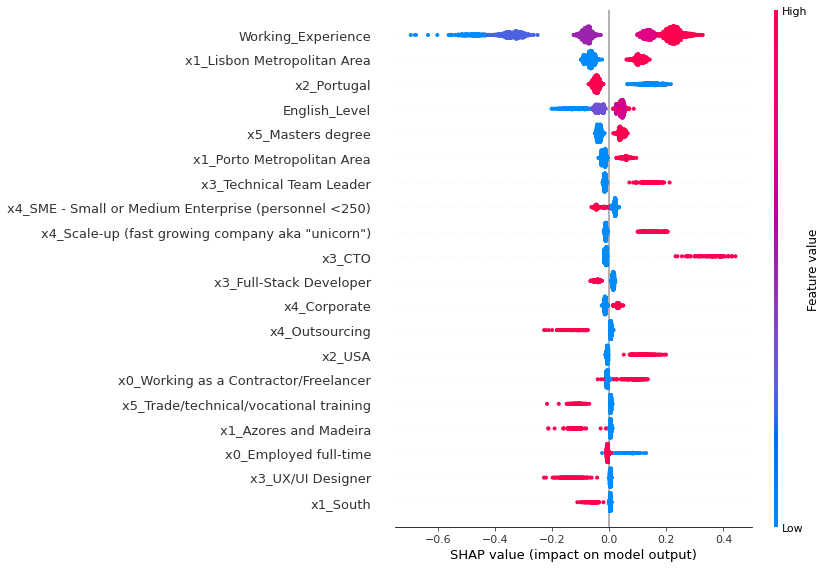

In [7]:
shap.summary_plot(shap_values, X)